- Put this notebook in the same folder as the other notebook so it can load the previously generated data.
- Create a folder named ```gif``` inside this folder
- Run this notebook
- Go to ```gif``` folder, theen the terminal in that diectory and type ```convert -delay 8 -dispose Background +page /tunnel_*.png -loop 0 tunnel_8.gif```

If you dont have linux (or maybe mac os) probably it will not work.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

In [47]:
def transmission_probability(pp):
    idx = np.linspace(-60, 60, 2401)>2
    idx = idx.reshape((len(idx),1))
    a = np.ones((len(idx),1))
    a[0], a[-1] = 0.5, 0.5
    TT = pp * idx * a
    TT = TT.sum(axis=0) * 0.05
    return TT

In [119]:
k_0_list = [1.57142857, 2.64285714, 4.250000, 5.85714286]

T = {}
p = {}
for k_0 in k_0_list:
    pp = np.loadtxt('probability_density_k_0_%g.npy'%(k_0))
    TT = transmission_probability(pp)
    pp = pp[::10,::50].T
    TT = TT[::50]
    T[k_0] = TT
    p[k_0] = pp

In [120]:
x = np.linspace(-60, 60, 2401)[::10]
time = np.arange(0, 50+0.005, 0.005)[::50]
colors = dict(zip(k_0_list,['C0', 'C1', 'C2', 'C3']))

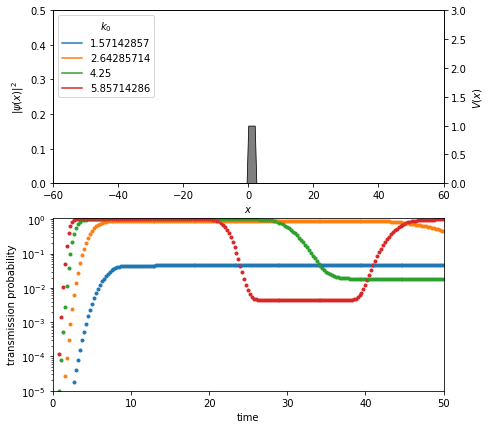

In [122]:
f, ax = plt.subplots(2,1, figsize=(7,7))

norm = matplotlib.colors.Normalize(vmin=0, vmax=len(pp))

bx = ax[0].twinx()
bx.fill_between(x, np.logical_and(0<=x,x<=2), edgecolor='k', lw=0.75, facecolor='#7f7f7f', alpha=1)
bx.set(ylim=(0,3), ylabel='$V(x)$');

ax[0].set(xlim=(-60,60), ylim=(0,0.5), xlabel='$x$', ylabel='$|\psi(x)|^2$')
ax[1].set(xlim=(0,50), ylim=(1e-5,1.1), xlabel='time', ylabel='transmission probability');

for i, t in enumerate(time):
    for k_0 in k_0_list:
        ax[0].plot(x, p[k_0][i], c=colors[k_0], label=str(k_0))
        ax[0].legend(loc='upper left', title='$k_0$')
        ax[1].semilogy([t], [T[k_0][i]], c=colors[k_0], marker='o', ms=3)
    f.savefig('gif/tunnel_%.3d.png'%i)
    ax[0].lines[0].remove()
    ax[0].lines[0].remove()
    ax[0].lines[0].remove()
    ax[0].lines[0].remove()